In [1]:
import pandas as pd
import seaborn as sns 

In [2]:
df = pd.read_csv('Breast_cancer_data.csv')

In [3]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


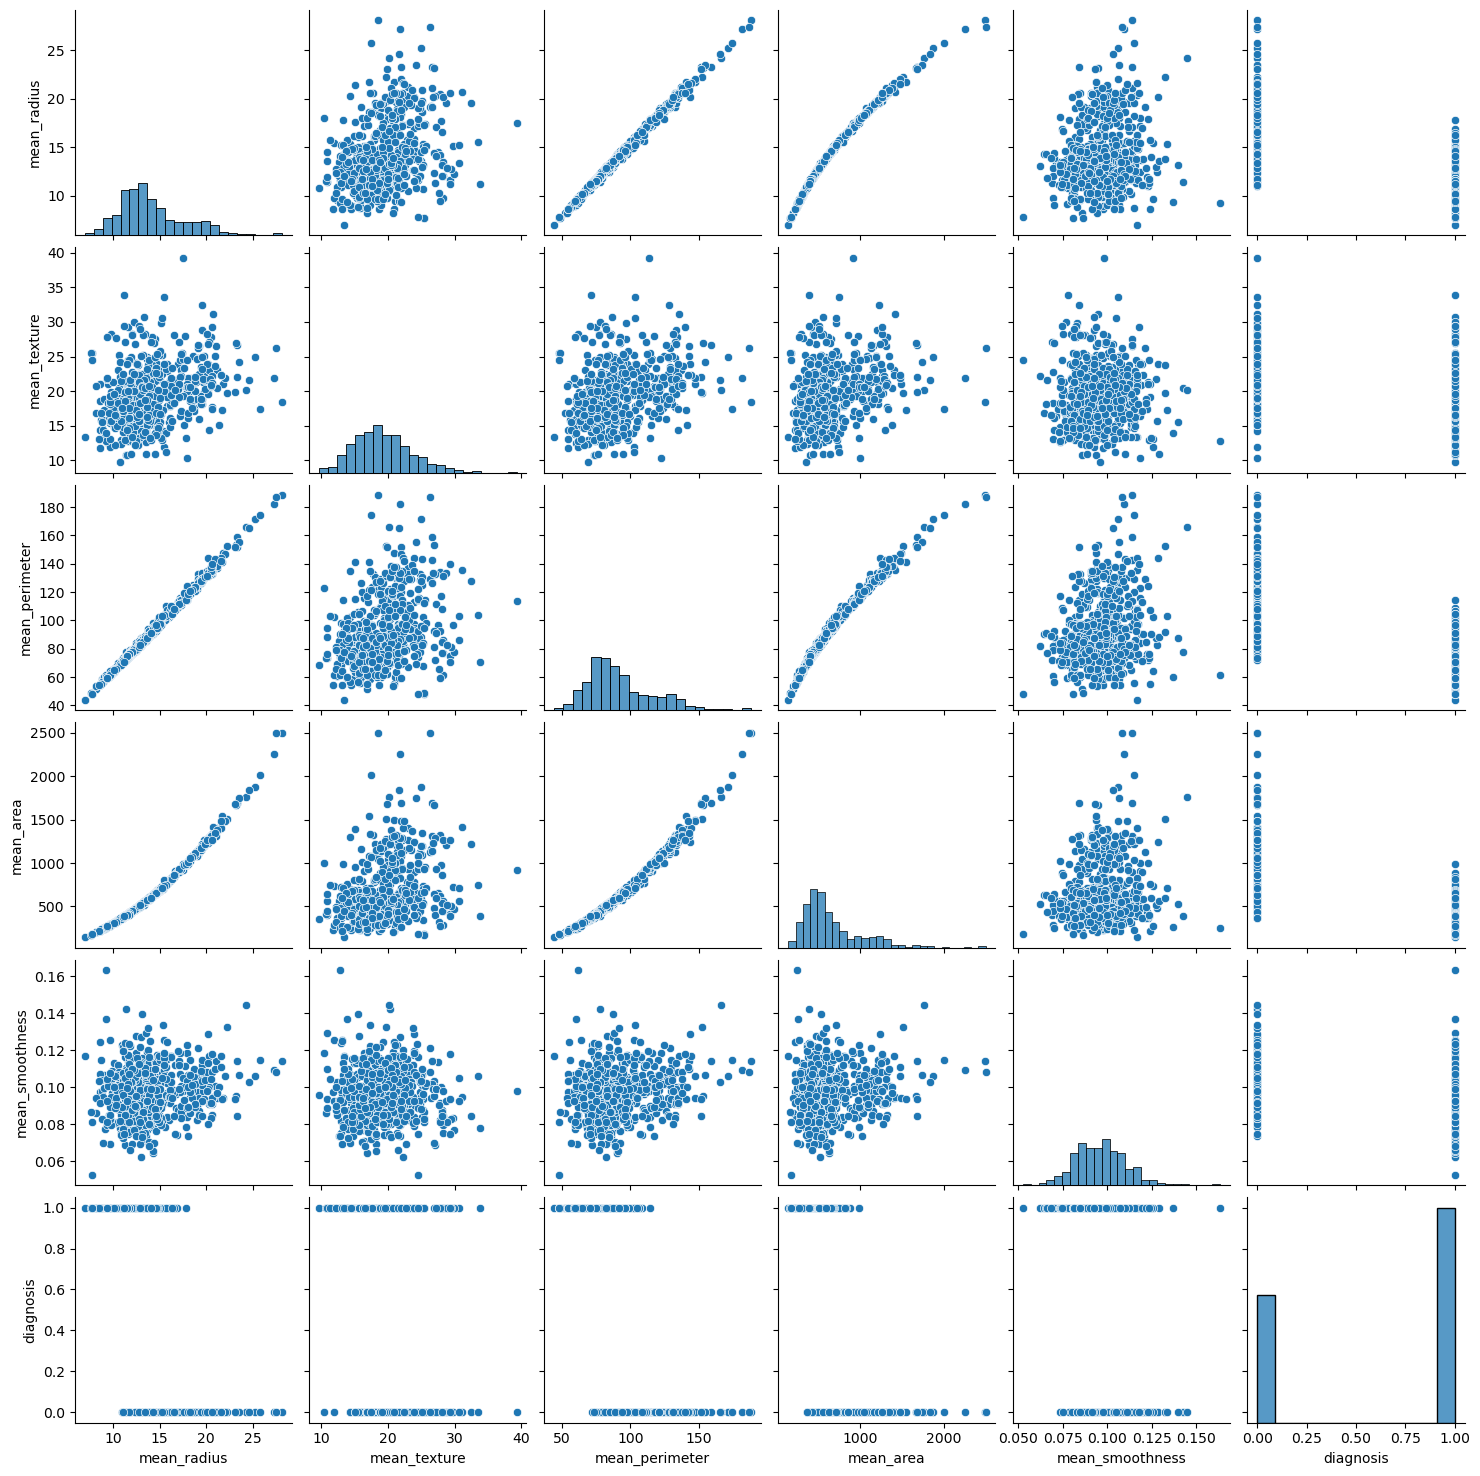

In [5]:
sns.pairplot(df,diag_kind="hist")

# Calcul de la corrélation

In [6]:
corr = df.corr()

# Visualisation de la correlation

In [7]:
sns.heatmap(corr,vmax=1,vmin=-0.5,linewidths=0.2)

<AxesSubplot:>

## analyse de la corrélation

On peut remarquer que les colonnes 'mean_radius',  'mean_perimeter' et 'mean_area'
sont corrélés alors on va garder seulement une colonne parmi eux 

In [8]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [9]:
data = df[['mean_radius', 'mean_texture','mean_smoothness', 'diagnosis']]

## élaboration X ey y

In [10]:
X=data[['mean_radius', 'mean_texture','mean_smoothness']]
y= data[['diagnosis']]

In [11]:
data.head()

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0


## Découper dataset en 20% pour test et 80% pour traning

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8 )

In [14]:
x_train.head()

,mean_radius,mean_texture,mean_smoothness
250,20.94,23.56,0.10070
82,25.22,24.91,0.10630
35,16.74,21.59,0.09610
437,14.04,15.98,0.08458
446,17.75,28.03,0.09997


## Training en utilisant Naive Bayes Gaussien

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
nb = GaussianNB()

In [17]:
y_train['diagnosis'].values.shape

(455,)

In [18]:
nb.fit(x_train,y_train['diagnosis'].values)

GaussianNB()

In [19]:
y_train['diagnosis'].values.shape

(455,)

In [20]:
y_pred = nb.predict(x_test)

## Evaluation du modèle

In [21]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, accuracy_score, precision_score

In [22]:
y_test.value_counts()

diagnosis
1            73
0            41
dtype: int64

In [23]:
confusion_matrix(y_test,y_pred)

array([[31, 10],
       [ 2, 71]], dtype=int64)

In [24]:
print("F1_score", f1_score(y_pred,y_test))
print("Accuracy ", accuracy_score(y_pred,y_test))
print("Recall ", recall_score(y_pred,y_test))
print("Precision ", precision_score(y_pred,y_test))

F1_score 0.922077922077922
Accuracy  0.8947368421052632
Recall  0.8765432098765432
Precision  0.9726027397260274
